In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
pd.options.mode.copy_on_write = True # Allow re-write on variable
sns.set_style('darkgrid') # Seaborn style
warnings.filterwarnings('ignore') # Ignore warnings
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature

In [5]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [7]:
data = pd.read_csv('/content/gdrive/MyDrive/MiniProject/archive/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
# Drop column = 'id'
data.drop(columns='id', inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [10]:
round(data.describe(include='all'), 2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.00,5110.0,5110.00,5110,5110,5110,5110.00,4909.00,5110,5110.00
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.23,0.1,0.05,NaN,NaN,NaN,106.15,28.89,NaN,0.05
std,NaN,22.61,0.3,0.23,NaN,NaN,NaN,45.28,7.85,NaN,0.22
min,NaN,0.08,0.0,0.00,NaN,NaN,NaN,55.12,10.30,NaN,0.00
25%,NaN,25.00,0.0,0.00,NaN,NaN,NaN,77.24,23.50,NaN,0.00
50%,NaN,45.00,0.0,0.00,NaN,NaN,NaN,91.88,28.10,NaN,0.00
75%,NaN,61.00,0.0,0.00,NaN,NaN,NaN,114.09,33.10,NaN,0.00


In [11]:
data.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


In [12]:
print((data.isna().sum()/len(data))*100)

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


this difference is just 4%

In [13]:
### Missing values in BMI columns is about 4% , we drop them.
data.dropna(how='any', inplace=True)

In [14]:
cols = data.columns[:-1]
cols

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [15]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [16]:
df=pd.DataFrame(data)

In [17]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [18]:
def categorize_age_df(df):
    bins = [0, 18, 40, float("inf")]
    labels = [0, 1, 2]
    df["age"] = pd.cut(df["age"], bins=bins, labels=labels)
    return df

In [19]:
def categorize_bmi_df(df):
    bins = 3
    labels = [0, 1, 2]
    df["bmi"] = pd.cut(df["bmi"], bins=bins, labels=labels)
    return df

In [20]:
def categorize_glu_df(df):
    bins = 3
    labels = [0, 1, 2]
    df["avg_glucose_level"] = pd.cut(df["avg_glucose_level"], bins=bins, labels=labels)
    return df

In [21]:
t1=categorize_age_df(df)
t1


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,2,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,2,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,2,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,2,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,2,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,1,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,2,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [22]:
t2=categorize_bmi_df(df)
t2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,2,0,1,Yes,Private,Urban,228.69,0,formerly smoked,1
2,Male,2,0,1,Yes,Private,Rural,105.92,0,never smoked,1
3,Female,2,0,0,Yes,Private,Urban,171.23,0,smokes,1
4,Female,2,1,0,Yes,Self-employed,Rural,174.12,0,never smoked,1
5,Male,2,0,0,Yes,Private,Urban,186.21,0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,0,0,0,No,children,Rural,103.08,0,Unknown,0
5106,Female,2,0,0,Yes,Self-employed,Urban,125.20,1,never smoked,0
5107,Female,1,0,0,Yes,Self-employed,Rural,82.99,0,never smoked,0
5108,Male,2,0,0,Yes,Private,Rural,166.29,0,formerly smoked,0


In [23]:
t3=categorize_glu_df(df)
t3

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,2,0,1,Yes,Private,Urban,2,0,formerly smoked,1
2,Male,2,0,1,Yes,Private,Rural,0,0,never smoked,1
3,Female,2,0,0,Yes,Private,Urban,1,0,smokes,1
4,Female,2,1,0,Yes,Self-employed,Rural,1,0,never smoked,1
5,Male,2,0,0,Yes,Private,Urban,1,0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,0,0,0,No,children,Rural,0,0,Unknown,0
5106,Female,2,0,0,Yes,Self-employed,Urban,0,1,never smoked,0
5107,Female,1,0,0,Yes,Self-employed,Rural,0,0,never smoked,0
5108,Male,2,0,0,Yes,Private,Rural,1,0,formerly smoked,0


In [24]:
numeric_columns = ['age', 'bmi', 'avg_glucose_level']
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

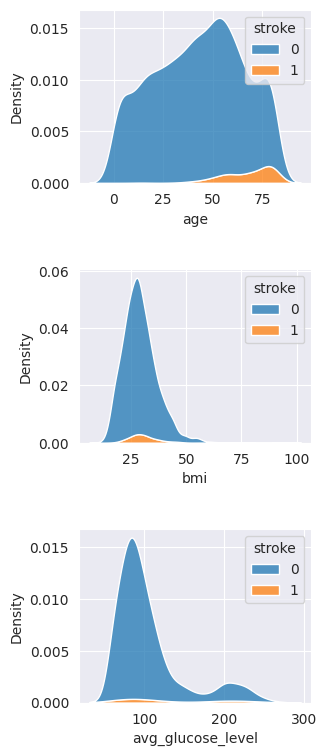

In [54]:
i = 0
fig, ax = plt.subplots(3, 1, figsize=(3,9))
plt.subplots_adjust(hspace = 0.5)
for num_col in numeric_columns :
    sns.kdeplot(x=num_col, hue='stroke', data=data, multiple='stack', ax=ax[i])
    i+=1
plt.show()

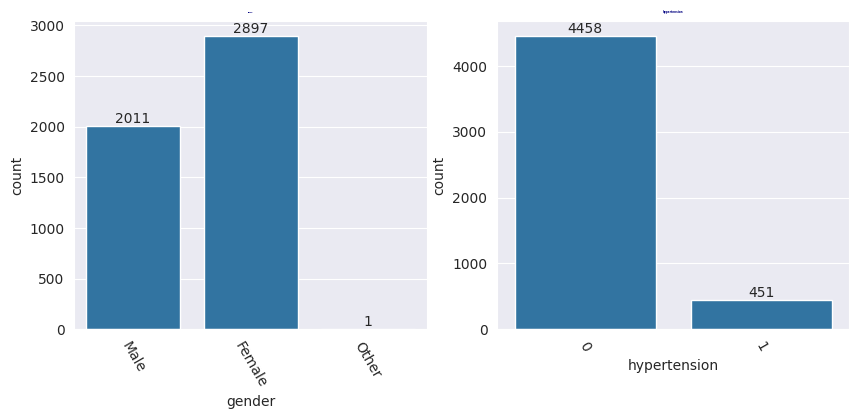

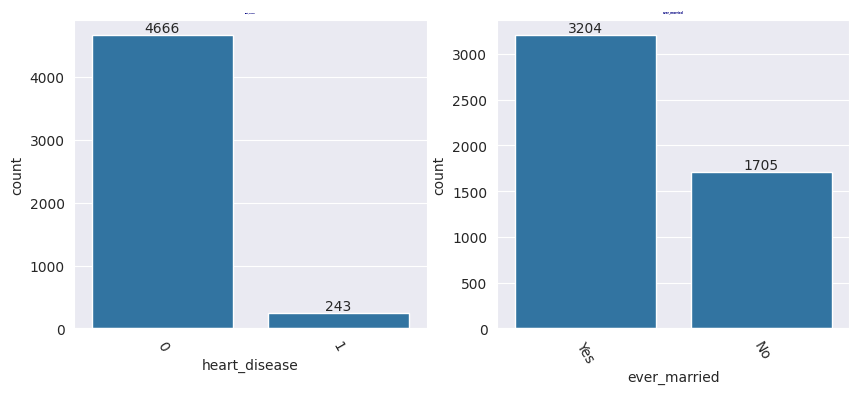

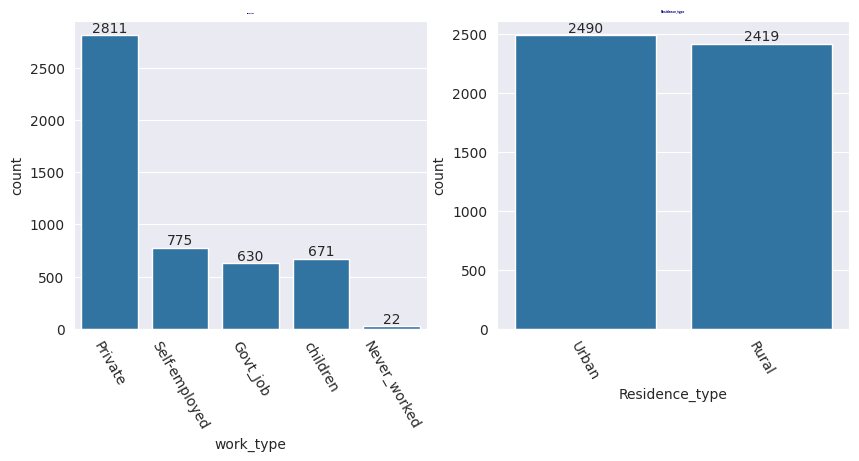

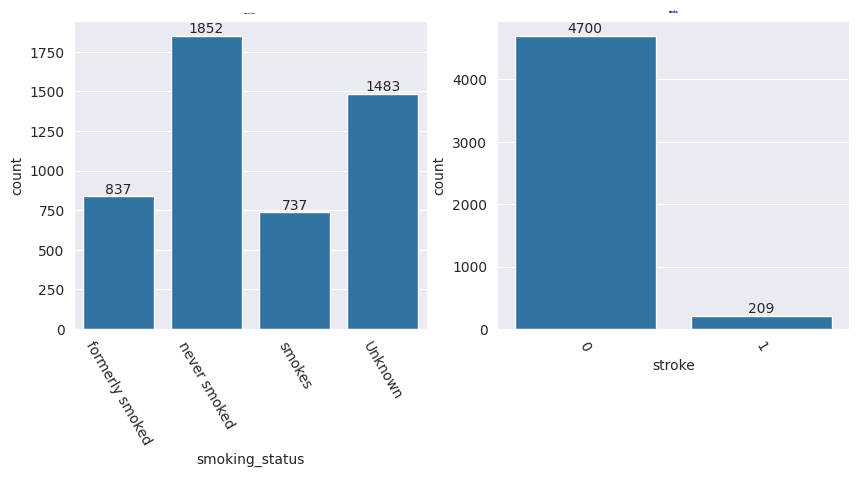

In [55]:
i=0
while i<8 :

    # Left AX
    fig = plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(categorical_columns[i], size=0.5, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_columns[i], data=data)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    i+=1

    # Right AX
    plt.subplot(1, 2, 2)
    plt.title(categorical_columns[i], size=2, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_columns[i], data=data)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    i+=1
    plt.show()

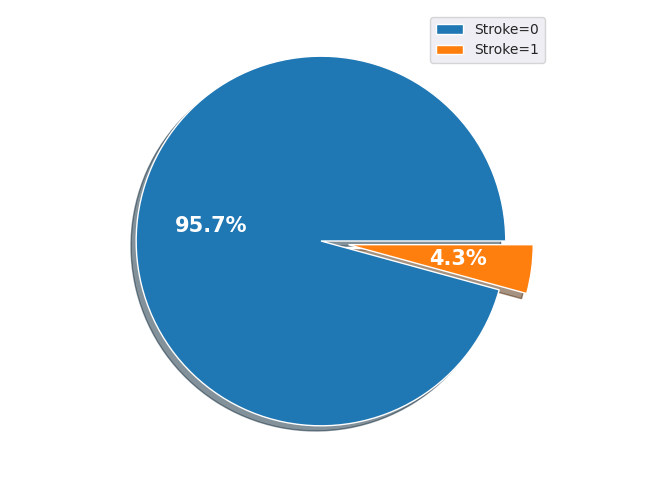

In [56]:
x = data['stroke'].value_counts()


explode = [0, 0.15]
labels = ['Stroke=0', 'Stroke=1']
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

plt.pie(x, explode=explode, shadow=True, autopct='%1.1f%%', labels=labels, textprops=dict(color="w", weight='bold', size=15))
plt.legend()
plt.show()

In [57]:
def pre_process(df_input):
  # gender
  df_input = df_input.replace(
      {'gender' : {'Male' : 0, 'Female' : 1, 'Other' : 2}}
  )

  # ever_married
  df_input =  df_input.replace(
      {'ever_married' : {'Yes' : 0, 'No' : 1}}
  )

  # work_type
  df_input =  df_input.replace(
      {'work_type' : {'Private' : 0, 'Self-employed' : 1, 'Govt_job' : 2, 'children' : 3, 'Never_worked' : 4}}
  )
  # smoking_status
  df_input =  df_input.replace(
      {'smoking_status' : {'formerly smoked' : 0, 'never smoked' : 1, 'smokes' : 2, 'Unknown' : 3}}
  )

  # Residence_type
  df_input =  df_input.replace(
      {'Residence_type' : {'Urban' : 0, 'Rural' : 1}}
  )
  bin_age = [0, 18, 40, float("inf")]
  bin_bmi = [0, 30, 60, float("inf")]
  bin_glu = [0, 100, 200, float("inf")]
  labels = [0, 1, 2]
  df_input["age"] = pd.cut(df_input["age"], bins=bin_age, labels=labels)
  df_input["bmi"] = pd.cut(df_input["bmi"], bins=bin_bmi, labels=labels)
  df_input["avg_glucose_level"] = pd.cut(df_input["avg_glucose_level"], bins=bin_glu, labels=labels)
  return df_input


In [58]:
cols = ["gender", "age", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "avg_glucose_level", "bmi", "smoking_status"]
input_user = "Male,67,0,1,Yes,Private,Urban,222.69,36.6,formerly smoked"
l = input_user.split(",")
for i in range(len(l)):
  if l[i].isnumeric():
    l[i]=int(l[i])
l[7]=float(l[7])
l[8]=float(l[8])
df_input = pd.DataFrame([l], columns=cols)
df_input.info()
print(l)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1 non-null      object 
 1   age                1 non-null      int64  
 2   hypertension       1 non-null      int64  
 3   heart_disease      1 non-null      int64  
 4   ever_married       1 non-null      object 
 5   work_type          1 non-null      object 
 6   Residence_type     1 non-null      object 
 7   avg_glucose_level  1 non-null      float64
 8   bmi                1 non-null      float64
 9   smoking_status     1 non-null      object 
dtypes: float64(2), int64(3), object(5)
memory usage: 208.0+ bytes
['Male', 67, 0, 1, 'Yes', 'Private', 'Urban', 222.69, 36.6, 'formerly smoked']


In [59]:
dd=pre_process(df_input)
dd

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,2,0,1,0,0,0,2,1,0
